## Problem Statement

In this assignment students have to find the frequency of words in a webpage. <br>
User can use urllib and BeautifulSoup to extract text from webpage.

## Import Libraries & Read Data

In [22]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
import matplotlib.pyplot as plt

In [2]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

## Check The Test Data

In [26]:
## Remove the html tags from the text and check the data

text = soup.get_text(strip=True)
print (text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

In [37]:
# Tokennize words

tokens = [t for t in text.split()] 
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

In [41]:
#Check for stopwords
from nltk.corpus import stopwords
sw=stopwords.words('english')

# Count Frequency of Stopwords, if any
freq = nltk.FreqDist(tokens) 

freq.most_common(5)

[('PHP', 132), ('the', 111), ('of', 98), ('can', 78), ('and', 77)]

### Observation:
we can clearly observe the webpage contains stopwords. So, we may remove these and tokenize the data again

In [53]:
#Remove StopWords & tokenize text

clean_tokens = tokens[:] 
for token in tokens:
    if token.lower() in sw:
        clean_tokens.remove(token)

# Frequencey Distribution Of tokenized words
freq = nltk.FreqDist(clean_tokens) 

# Check the frequency of top most common words in the text
freq.most_common(20)

[('PHP', 132),
 ('release', 74),
 ('found', 68),
 ('source', 32),
 ('list', 30),
 ('also', 27),
 ('team', 25),
 ('downloads', 25),
 ('please', 25),
 ('visit', 25),
 ('Windows', 24),
 ('binaries', 24),
 ('7.3.0', 23),
 ('read', 23),
 ('ReleasedThe', 21),
 ('next', 20),
 ('test', 19),
 ('version', 19),
 ('report', 18),
 ('thebug', 18)]

## Plot the Frequency

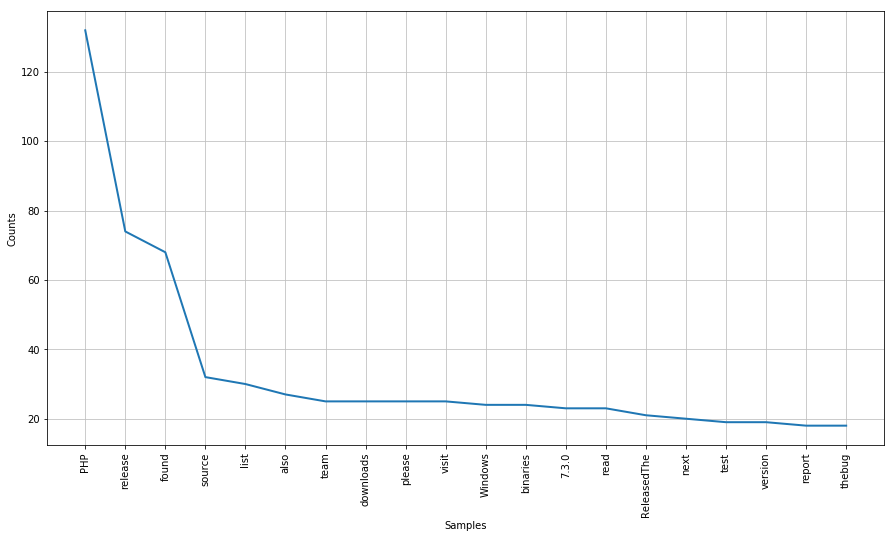

In [54]:
plt.figure(figsize=(15,8))
freq.plot(20,cumulative=False)